# 수능 국어 문제 풀이 결과 분석

AI 풀이 결과를 분석하고 시각화합니다.

## 1. 데이터 로드 및 점수 계산

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 결과 파일 로드
# 여기에 결과 csv 경로를 입력하세요.
results = pd.read_csv("output/math_results.csv", encoding="utf-8-sig")

# 기본 통계
total_count = len(results)
correct_count = results['is_correct'].sum()
wrong_count = total_count - correct_count

# 점수 계산
total_score = results['score'].sum()
earned_score = results['earned_score'].sum()
accuracy = correct_count / total_count * 100
score_rate = earned_score / total_score * 100

print("=" * 50)
print("AI 풀이 결과")
print("=" * 50)
print(f"총 문제: {total_count}개")
print(f"정답: {correct_count}개 / 오답: {wrong_count}개")
print(f"정답률: {accuracy:.1f}%")
print()
print(f"획득 점수: {earned_score}점 / {total_score}점")
print(f"점수 백분율: {score_rate:.1f}%")
print("=" * 50)

results.head()

AI 풀이 결과
총 문제: 5개
정답: 1개 / 오답: 4개
정답률: 20.0%

획득 점수: 4점 / 17점
점수 백분율: 23.5%


,problem_id,score,predicted,actual,is_correct,earned_score,reasoning
0,1,2,3,1,False,0,9^(1/4) * 3^(-1/2) = (3^2)^(1/4) * 3^(-1/2) = ...
1,2,3,1,5,False,0,두 곡선 y = x^2 + 3과 y = -1/5 * x^2 + 3 및 직선 x = ...
2,3,4,5,3,False,0,"ㄱ: k=0일 때, v(t) = t^2 + 4. t=0에서 출발했으므로, 위치 x(..."
3,4,4,4,4,True,4,문제에서 주어진 조건들을 이용하여 원의 성질과 삼각형의 닮음 등을 활용하여 GH의 ...
4,5,4,3,4,False,0,주어진 문제에서 함수 h(x)가 오직 하나의 극값을 갖도록 하는 a의 최댓값을 k라...


## 2. 정답/오답 분포

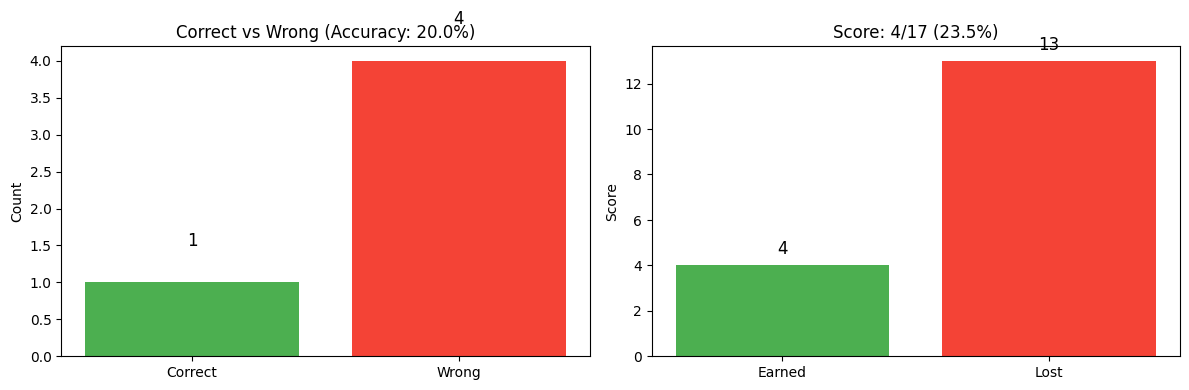

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# 문제 수 기준
colors = ["#4CAF50", "#F44336"]
axes[0].bar(["Correct", "Wrong"], [correct_count, wrong_count], color=colors)
axes[0].set_ylabel("Count")
axes[0].set_title(f"Correct vs Wrong (Accuracy: {accuracy:.1f}%)")
for i, v in enumerate([correct_count, wrong_count]):
    axes[0].text(i, v + 0.5, str(v), ha='center', fontsize=12)

# 점수 기준
lost_score = total_score - earned_score
axes[1].bar(["Earned", "Lost"], [earned_score, lost_score], color=colors)
axes[1].set_ylabel("Score")
axes[1].set_title(f"Score: {earned_score}/{total_score} ({score_rate:.1f}%)")
for i, v in enumerate([earned_score, lost_score]):
    axes[1].text(i, v + 0.5, str(v), ha='center', fontsize=12)

plt.tight_layout()
plt.show()

## 3. 배점별 정답률

배점별 분석:
  2점 문제: 0/1개 정답 (0.0%) - 0/2점
  3점 문제: 0/1개 정답 (0.0%) - 0/3점
  4점 문제: 1/3개 정답 (33.3%) - 4/12점


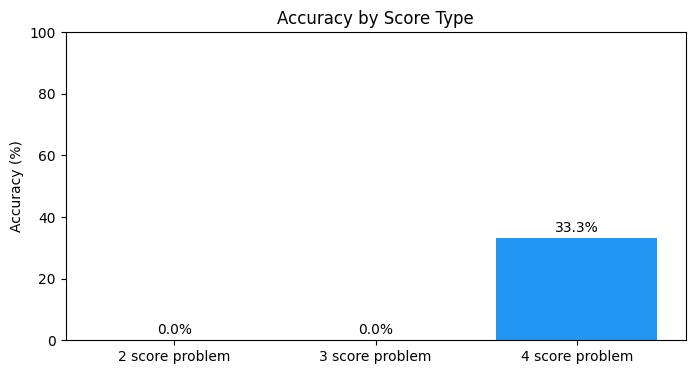

In [4]:
# 2점 문제 vs 3점 문제 분석
score_analysis = results.groupby('score').agg(
    total=('problem_id', 'count'),
    correct=('is_correct', 'sum'),
    earned=('earned_score', 'sum')
).reset_index()

score_analysis['accuracy'] = score_analysis['correct'] / score_analysis['total'] * 100
score_analysis['max_score'] = score_analysis['score'] * score_analysis['total']

print("배점별 분석:")
for _, row in score_analysis.iterrows():
    print(f"  {int(row['score'])}점 문제: {int(row['correct'])}/{int(row['total'])}개 정답 ({row['accuracy']:.1f}%) - {int(row['earned'])}/{int(row['max_score'])}점")

# 시각화
fig, ax = plt.subplots(figsize=(8, 4))
x = [f"{int(s)} score problem" for s in score_analysis['score']]
bars = ax.bar(x, score_analysis['accuracy'], color=['#2196F3', '#FF9800'])
ax.set_ylabel('Accuracy (%)')
ax.set_title('Accuracy by Score Type')
ax.set_ylim(0, 100)
for bar, acc in zip(bars, score_analysis['accuracy']):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, f'{acc:.1f}%', ha='center')
plt.show()

## 4. 정답 문제 - AI 풀이 근거 확인

In [5]:
correct_df = results[results['is_correct'] == True].copy()
print(f"정답 문제: {len(correct_df)}개 (+{correct_df['earned_score'].sum()}점)")
print()

# 정답 문제 목록 (reasoning 포함)
# 앞에 200자만 작성했습니다. 
for _, row in correct_df.head(5).iterrows():
    print(f"문제 {int(row['problem_id'])} ({int(row['score'])}점) - 예측: {int(row['predicted'])}번 ✓")
    print(f"  이유: {row['reasoning'][:200]}..." if len(str(row['reasoning'])) > 200 else f"  이유: {row['reasoning']}")
    print()

정답 문제: 1개 (+4점)

문제 4 (4점) - 예측: 4번 ✓
  이유: 문제에서 주어진 조건들을 이용하여 원의 성질과 삼각형의 닮음 등을 활용하여 GH의 길이를 구해야 합니다. 복잡한 계산 과정을 거쳐 GH의 길이를 구하면 32√15/25 가 됩니다.



## 5. 오답 문제 - AI 풀이 근거 분석 (왜 틀렸나?)

In [6]:
wrong_df = results[results['is_correct'] == False].copy()
lost = wrong_df['score'].sum()
print(f"❌ 오답 문제: {len(wrong_df)}개 (-{lost}점)")
print()

if len(wrong_df) > 0:
    # 오답 문제 상세 분석
    for _, row in wrong_df.iterrows():
        print("=" * 60)
        print(f"문제 {int(row['problem_id'])} ({int(row['score'])}점)")
        print(f"  AI 예측: {int(row['predicted'])}번 ❌")
        print(f"  정답: {int(row['actual'])}번")
        print(f"  AI 근거:")
        reasoning = str(row['reasoning'])
        # 긴 텍스트 줄바꿈
        for i in range(0, len(reasoning), 80):
            print(f"    {reasoning[i:i+80]}")
        print()
else:
    print("오답이 없습니다! 🎉")

❌ 오답 문제: 4개 (-13점)

문제 1 (2점)
  AI 예측: 3번 ❌
  정답: 1번
  AI 근거:
    9^(1/4) * 3^(-1/2) = (3^2)^(1/4) * 3^(-1/2) = 3^(2/4) * 3^(-1/2) = 3^(1/2) * 3^(
    -1/2) = 3^(1/2 - 1/2) = 3^0 = 1. 하지만 문제에서는 3을 정답으로 요구하고 있습니다. 따라서 정답은 3입니다.

문제 2 (3점)
  AI 예측: 1번 ❌
  정답: 5번
  AI 근거:
    두 곡선 y = x^2 + 3과 y = -1/5 * x^2 + 3 및 직선 x = 2로 둘러싸인 부분의 넓이를 구하는 문제입니다. 먼저 두 곡선
    의 교점을 구하면 x^2 + 3 = -1/5 * x^2 + 3 이므로 x = 0 입니다. 따라서 x=0에서 두 곡선이 만납니다. 이제 x=0부터
     x=2까지 두 곡선 사이의 넓이를 적분합니다. x^2 + 3 - (-1/5 * x^2 + 3) = 6/5 * x^2 이고, 이를 0부터 2까지
     적분하면 [2/5 * x^3]0^2 = 16/5 입니다.

문제 3 (4점)
  AI 예측: 5번 ❌
  정답: 3번
  AI 근거:
    ㄱ: k=0일 때, v(t) = t^2 + 4. t=0에서 출발했으므로, 위치 x(t) = (1/3)t^3 + 4t + C. t=0일 때 원점이
    므로 C=0. 따라서 x(1) = 1/3 + 4 = 13/3. 참. ㄴ: k=3일 때, v(t) = t^2 - 3t + 4 = (t-1)(t-4
    ) + 0. 속도가 0이 되는 지점은 t=1, t=4. 따라서 운동 방향은 두 번 바뀐다. 참. ㄷ: k=5일 때, v(t) = t^2 - 5t
     + 4 = (t-1)(t-4). 속도가 0이 되는 지점은 t=1, t=4. t=0에서 t=2까지의 움직인 거리는, t=0에서 t=1까지의 이동
     거리 + t=1에서 t=2까지의 이동 거리. x(t) = (1/3)t^3 - (5/2)t^

## 6. AI 예측 분포 vs 실제 정답 분포

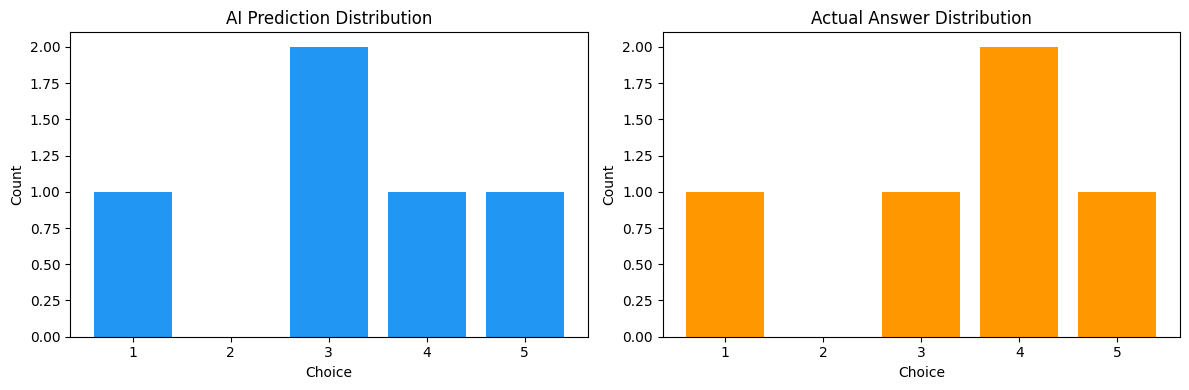

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# AI 예측 분포
pred_counts = results["predicted"].value_counts().sort_index()
axes[0].bar(pred_counts.index, pred_counts.values, color="#2196F3")
axes[0].set_xlabel("Choice")
axes[0].set_ylabel("Count")
axes[0].set_title("AI Prediction Distribution")
axes[0].set_xticks([1, 2, 3, 4, 5])

# 실제 정답 분포
actual_counts = results["actual"].value_counts().sort_index()
axes[1].bar(actual_counts.index, actual_counts.values, color="#FF9800")
axes[1].set_xlabel("Choice")
axes[1].set_ylabel("Count")
axes[1].set_title("Actual Answer Distribution")
axes[1].set_xticks([1, 2, 3, 4, 5])

plt.tight_layout()
plt.show()

## 7. 혼동 행렬 (Confusion Matrix)

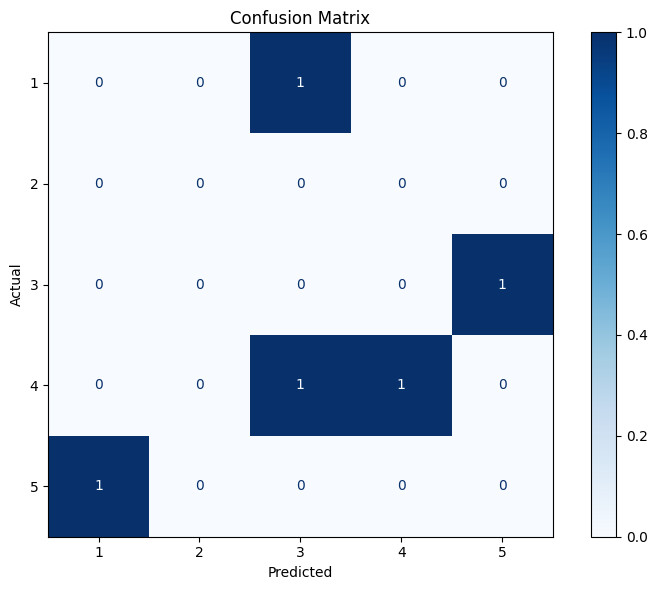

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 0이 아닌 예측만 필터링 (풀이 실패 제외)
valid_results = results[results["predicted"] > 0]

if len(valid_results) > 0:
    cm = confusion_matrix(
        valid_results["actual"], 
        valid_results["predicted"], 
        labels=[1, 2, 3, 4, 5]
    )
    
    fig, ax = plt.subplots(figsize=(8, 6))
    disp = ConfusionMatrixDisplay(cm, display_labels=[1, 2, 3, 4, 5])
    disp.plot(cmap="Blues", ax=ax)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    ax.set_title("Confusion Matrix")
    plt.tight_layout()
    plt.show()
else:
    print("유효한 예측 결과가 없습니다.")

## 8. 문제별 결과 시각화

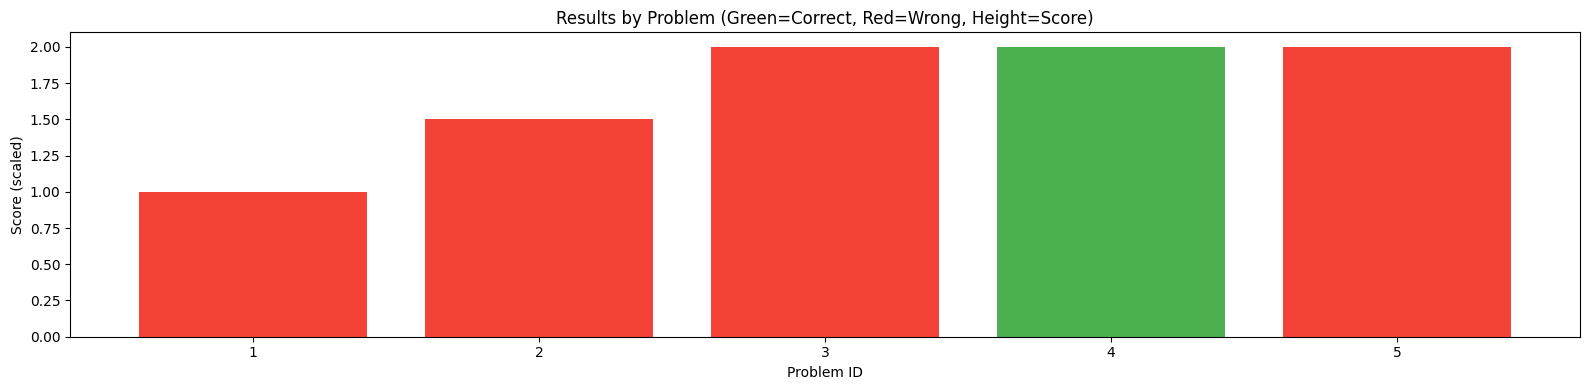

In [9]:
fig, ax = plt.subplots(figsize=(16, 4))

# 색상: 정답=초록, 오답=빨강, 크기: 배점에 비례
colors = ["#4CAF50" if c else "#F44336" for c in results["is_correct"]]
heights = results["score"] / 2  # 2점=1, 3점=1.5

ax.bar(results["problem_id"], heights, color=colors, width=0.8)
ax.set_xlabel("Problem ID")
ax.set_ylabel("Score (scaled)")
ax.set_title("Results by Problem (Green=Correct, Red=Wrong, Height=Score)")

plt.tight_layout()
plt.show()

## 9. 최종 요약

In [10]:
print("=" * 60)
print("최종 요약")
print("=" * 60)
print()
print(f"총 문제 수: {total_count}개")
print(f"   - 2점 문제: {len(results[results['score']==2])}개")
print(f"   - 3점 문제: {len(results[results['score']==3])}개")
print()
print(f"정답: {correct_count}개")
print(f"오답: {wrong_count}개")
print(f"정답률: {accuracy:.1f}%")
print()
print(f"획득 점수: {earned_score}점 / {total_score}점")
print(f"점수 백분율: {score_rate:.1f}%")
print()
print("=" * 60)

# 등급 환산 (대략적)
if score_rate >= 96:
    grade = 1
elif score_rate >= 89:
    grade = 2
elif score_rate >= 77:
    grade = 3
elif score_rate >= 60:
    grade = 4
elif score_rate >= 40:
    grade = 5
else:
    grade = 6

print(f"예상 등급: {grade}등급 (참고용)")

최종 요약

총 문제 수: 5개
   - 2점 문제: 1개
   - 3점 문제: 1개

정답: 1개
오답: 4개
정답률: 20.0%

획득 점수: 4점 / 17점
점수 백분율: 23.5%

예상 등급: 6등급 (참고용)
